# IFIT3 NP RIP

## Overview

Test NP binding IFIT3 over IgG background. OMS did the RIP and provided me with RNA. I RT'd equal amounts (by volume) of RNA from IFIT3 or IgG and used in qPCR to detect NP.

## Analysis

Import the data as a dataframe and drop NTC and NA values.

In [56]:
import pandas as pd

data = pd.read_excel("OMS_IFIT3_RIP_replicates.xlsx", sheet_name="Results", skiprows=46, usecols=["Sample Name", "Target Name", "CT"], na_values=["NTC", "Undetermined"]).dropna()
data.head

<bound method NDFrame.head of      Sample Name Target Name         CT
0          igg_1      WSN_NP  24.462685
1          igg_1      WSN_NP  24.020170
2          igg_1      WSN_NP  23.990248
3          igg_2      WSN_NP  25.191076
4          igg_2      WSN_NP  25.299900
5          igg_2      WSN_NP  25.353312
6          igg_3      WSN_NP  22.486640
7          igg_3      WSN_NP  22.505870
8          igg_3      WSN_NP  22.676767
9        ifit3_1      WSN_NP  21.764706
10       ifit3_1      WSN_NP  21.415367
11       ifit3_1      WSN_NP  21.952050
12       ifit3_2      WSN_NP  21.276844
13       ifit3_2      WSN_NP  21.245590
14       ifit3_2      WSN_NP  21.157684
15       ifit3_3      WSN_NP  20.701029
16       ifit3_3      WSN_NP  20.424986
17       ifit3_3      WSN_NP  20.328117
18    igg_1_noRT      WSN_NP  31.495672
19    igg_2_noRT      WSN_NP  30.598267
20    igg_3_noRT      WSN_NP  31.554102
21  ifit3_1_noRT      WSN_NP  31.286550
22  ifit3_2_noRT      WSN_NP  30.493988
23  ifit3_

Drop noRT controls so they aren't used in calculations. Also take the mean of each biological replicate (from technical triplicates).

In [57]:
data = data[~data["Sample Name"].str.contains("noRT")].copy
data["mean"] = data.groupby(["Sample Name", "Target Name"])["CT"].transform("mean")

/tmp/ipykernel_357293/1000450354.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["mean"] = data.groupby(["Sample Name", "Target Name"])["CT"].transform("mean")


Caluclate delta CT and foldchange between igg and IFIT3 using the means of each bio replicate, drop the technical replicate data.

In [52]:
igg_data = data[data["Sample Name"].str.contains("igg")].drop("CT", axis=1)
igg_data = igg_data.drop_duplicates().reset_index(drop=True)
ifit3_data = data[data["Sample Name"].str.contains("ifit3")].drop("CT", axis=1)
ifit3_data = ifit3_data.drop_duplicates().reset_index(drop=True)
print(igg_data, ifit3_data)
dct = pd.DataFrame()
dct["replicate"] = ["1", "2", "3"]
dct["dct"] = ifit3_data["mean"] - igg_data["mean"]
dct["foldchange"] = 2 ** -dct["dct"]
print(dct)
dct.to_excel("ifit3_np_foldchange.xlsx")

  Sample Name Target Name       mean
0       igg_1      WSN_NP  24.157701
1       igg_2      WSN_NP  25.281429
2       igg_3      WSN_NP  22.556426   Sample Name Target Name       mean
0     ifit3_1      WSN_NP  21.710708
1     ifit3_2      WSN_NP  21.226706
2     ifit3_3      WSN_NP  20.484711
  replicate       dct  foldchange
0         1 -2.446993    5.452785
1         2 -4.054723   16.618558
2         3 -2.071715    4.203861


## Results

This shows 4-16 fold more NP binding IFIT3 vs. NP control. Now plot this data keeping each bio rep separate.

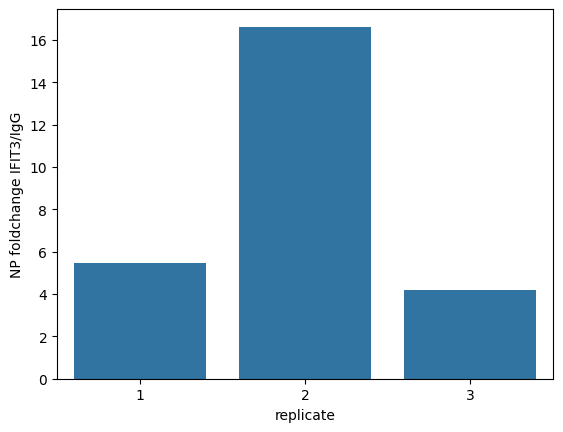

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = sns.barplot(data = dct, x = "replicate", y = "foldchange")
plt.ylabel("NP foldchange IFIT3/IgG")
plt.savefig("ifit3_np.png", dpi=300)
plt.show()
